<a href="https://colab.research.google.com/github/AngelRP8791/machine-learning-python-template/blob/main/Proyecto_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import zipfile
import os

In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = "/content/drive/MyDrive/dogs-vs-cats.zip"

In [5]:
zip_file_path = '/content/drive/MyDrive/dogs-vs-cats.zip'

In [6]:
extraction_path = '/content/extracted_files'

In [7]:
os.makedirs(extraction_path, exist_ok=True)

In [8]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Archivos extraídos en: {extraction_path}")

Archivos extraídos en: /content/extracted_files


In [9]:
archivos = "/content/extracted_files/dogs-vs-cats/train"

In [10]:
os.makedirs(os.path.join(archivos, "cats"))
os.makedirs(os.path.join(archivos, "dogs"))

In [11]:
import shutil
import os

url_dogs = "/content/extracted_files/dogs-vs-cats/train/dogs"
url_cats = "/content/extracted_files/dogs-vs-cats/train/cats"

for i in os.listdir(archivos):
    item_path = os.path.join(archivos, i)
    if os.path.isfile(item_path):  # Check if the item is a file
        if i.lower().startswith("dog"):
            shutil.move(item_path, os.path.join(url_dogs, i))
        elif i.lower().startswith("cat."):
            shutil.move(item_path, os.path.join(url_cats, i))

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

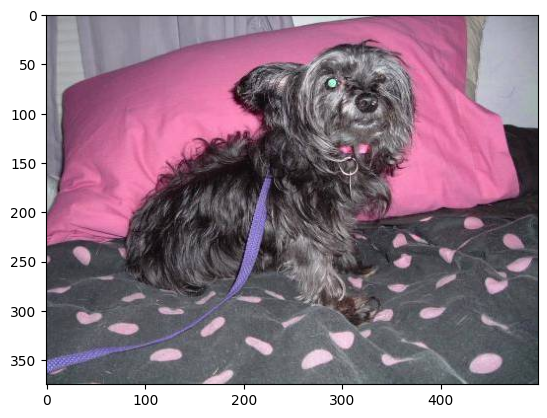

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from PIL import Image # Import Pillow

plt.figure(10)

perro = Image.open("/content/extracted_files/dogs-vs-cats/train/dogs/dog.0.jpg")

plt.imshow(perro) # Changed 'gatos' to 'perro' to display the opened image

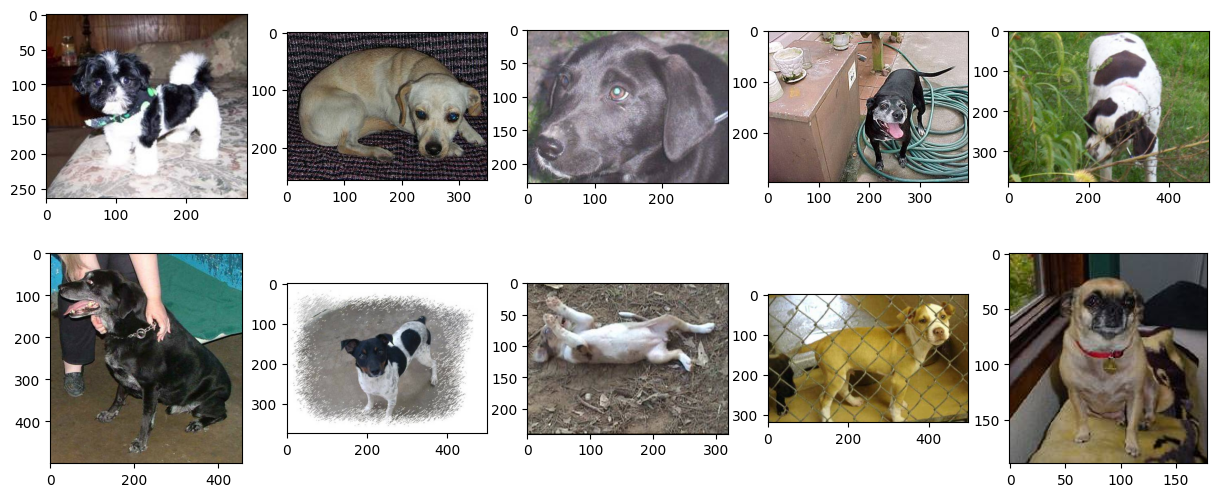

In [14]:
# Listar todas las imágenes de la carpeta
imagenes = os.listdir(url_dogs)

# Tomar las primeras 10 imágenes (puedes cambiar el número)
imagenes = imagenes[:10]

# Crear figura con espacio para 10 subplots (2 filas x 5 columnas)
plt.figure(figsize=(15, 6))

# Recorrer y mostrar cada imagen
for i, nombre_img in enumerate(imagenes):
    img_path = os.path.join(url_dogs, nombre_img)
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)  # (filas, columnas, índice)
    plt.imshow(img)

plt.show()

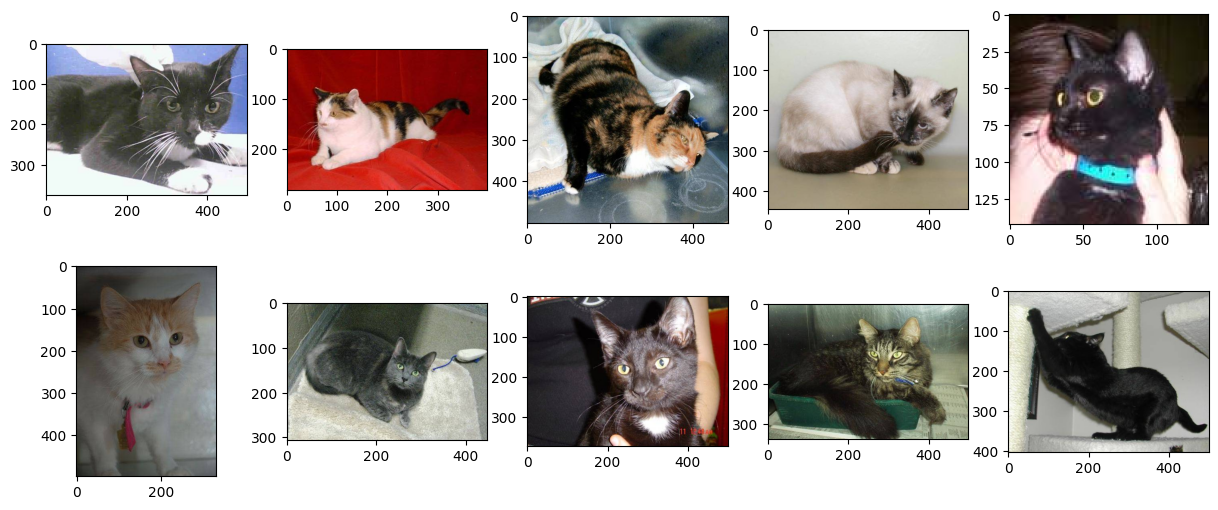

In [15]:
imagenes = os.listdir(url_cats)

# Tomar las primeras 10 imágenes (puedes cambiar el número)
imagenes = imagenes[:10]

# Crear figura con espacio para 10 subplots (2 filas x 5 columnas)
plt.figure(figsize=(15, 6))

# Recorrer y mostrar cada imagen
for i, nombre_img in enumerate(imagenes):
    img_path = os.path.join(url_cats, nombre_img)
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)  # (filas, columnas, índice)
    plt.imshow(img)

plt.show()

In [16]:
url_cats_os = os.listdir(url_cats)
url_dogs_os = os.listdir(url_dogs)

In [17]:
list_cats = [i for i in url_cats_os if i.startswith("cat.")]
list_dogs = [i for i in url_dogs_os if i.startswith("dog.")]

In [18]:
size200 = (200,200)

for i in list_cats:
  cat200 = os.path.join(url_cats,i)
  cat200_ = Image.open(cat200).convert('RGB')
  cat200_ = cat200_.resize(size200)
  cat200_.save(cat200)

In [19]:
list_dogs = [i for i in os.listdir(url_dogs) if i.startswith("dog.")]

for i in list_dogs:
    dog200 = os.path.join(url_dogs,i)
    dog200_ = Image.open(dog200).convert("RGB")
    dog200_ = dog200_.resize(size200)
    dog200_.save(dog200)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_train = ImageDataGenerator(rescale = 1./255, validation_split=0.2) # Added validation_split

In [21]:
train_g = data_train.flow_from_directory(directory = archivos,
                                         target_size = (200, 200),
                                         batch_size = 32,
                                         class_mode = "binary",
                                         subset = "training" # Specified subset as training
)

Found 20000 images belonging to 2 classes.


In [22]:
validador_g = data_train.flow_from_directory(directory = archivos,
                                         target_size = (200, 200),
                                         batch_size = 32,
                                         class_mode = "binary",
                                         subset = "validation" # Specified subset as validation
)

Found 5000 images belonging to 2 classes.


In [23]:
model = Sequential([
    Convolution2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),

    Convolution2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'), # Corrected Dense layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [25]:
model.fit(x = train_g, validation_data = validador_g, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1453s 2s/step - accuracy: 0.5870 - loss: 0.7167 - val_accuracy: 0.7094 - val_loss: 0.5801
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1483s 2s/step - accuracy: 0.7398 - loss: 0.5266 - val_accuracy: 0.7482 - val_loss: 0.5173
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1459s 2s/step - accuracy: 0.8230 - loss: 0.3995 - val_accuracy: 0.7710 - val_loss: 0.4883
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1415s 2s/step - accuracy: 0.8852 - loss: 0.2704 - val_accuracy: 0.7774 - val_loss: 0.5518
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1412s 2s/step - accuracy: 0.9360 - loss: 0.1643 - val_accuracy: 0.7754 - val_loss: 0.6353
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1390s 2s/step - accuracy: 0.9632 - loss: 0.1018 - val_accuracy: 0.7848 - val_loss: 0.7102
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1390s 2s/step - accuracy: 0.9748 - loss: 0.0738 - val_accuracy: 0.7808 - val_loss: 0.8015
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1391s 2s/step - accuracy: 0.9821 - loss: 0.0557 - val_accurac

KeyboardInterrupt: 

In [26]:
print(train_g.class_indices)

{'cats': 0, 'dogs': 1}


In [28]:
import numpy as np
carpeta = r"/content/drive/MyDrive/Pruebas deep learning"

# Extensiones válidas de imágenes
extensiones_validas = (".jpg", ".jpeg", ".png")

# Recorremos todos los archivos en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.lower().endswith(extensiones_validas):
        ruta_img = os.path.join(carpeta, archivo)

        # Cargar imagen y preprocesar
        prueba = image.load_img(ruta_img, target_size=(200, 200))
        prueba_a = image.img_to_array(prueba) / 255
        prueba_a = np.expand_dims(prueba_a, axis=0)

        # Predicción
        pred = model.predict(prueba_a, verbose=0)

        # Clasificación
        if pred[0][0] > 0.5:
            print(f"{archivo} ➡ es perro ({pred[0][0]:.2f})")
        else:
            print(f"{archivo} ➡ es gato ({1 - pred[0][0]:.2f})")

1.jpg ➡ es perro (0.97)
2.jpg ➡ es perro (1.00)
3.jpg ➡ es gato (1.00)
4.jpg ➡ es perro (1.00)
5.jpg ➡ es perro (0.99)
6.jpg ➡ es perro (0.70)
7.jpg ➡ es perro (1.00)
8.jpg ➡ es gato (0.99)
10.jpg ➡ es perro (0.78)
11.jpg ➡ es perro (1.00)
9.jpg ➡ es perro (1.00)
12.jpg ➡ es perro (1.00)
13.jpg ➡ es gato (0.69)


In [ ]:
#import numpy as np

#ruta = agregar ruta url
#prueba = image.load_img(ruta, target_size = (200, 200))
#prueba_a = image.img_to_array(prueba)/255
#prueba_a = np.expand_dims(prueba_a, axis = 0)

In [ ]:
#pred = model.predict(prueba_a)

In [ ]:
#if pred[0][0] > 0.5:
#    print("es perro")
#else:
#    print("es gato")